# Projet 3 OpenFoodFacts - Notebook de nettoyage du jeu de données

Le présent notebook regroupe le travail nécessaire au filtrage et nettoyage des données issue de l'initiative [Open Food Facts](https://world.openfoodfacts.org) dans le cadre de l'appel à projets de [l'Agence Santé Publique France](http://www.santepubliquefrance.fr/). 



### Partie 1: 
- ### Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser au mieux ces traitements pour éviter de répéter ces opérations.

L'Agence Santé Publique France cherche à lancer un appel à projets afin de trouver des idées innovantes en lien avec l'alimentation. 
Pour se faire, les candidats doivent se baser sur les données collectées par l'iniative Open Food Facts.


Celle-ci est portée par une association à but non lucratif. Cette dernière met à disposition, des consommateurs, une base de données de produits alimentaire.
Chaque entrée peut comporter:
- Le nom du produit
- Sa photo
- La photo de l'encart détaillant sa composition sur le packaging
- La photo de l'encart détaillant ses valeurs nutritionnelles sur le packaging
- Une analyse des ingrédients pouvant indiquer la présence ou non d'huile de palme dans la composition et le caractère végétalien ou non du produit
- La liste des additifs entrant dans la composition du produit
- Un indiquateur de groupe NOVA indiquant le niveau de transformation du produit allant de 1 (non ou peu transformé) à 4 (ultra transformé)
- Un indicateur de nutri-score indiquant la valeur nutritionnelle du produit allant de de A (aliments les plus sains) à E (aliments les moins sains)
- Les repères nutritionnels pour 100g
- La taille de la portion 
- Un tableau des informations nutritionnelles globales
- Un Eco-Score mesurant l'impact environnemental allant de A (faible impact)  à E (très fort impact)

Les enregistrements dans la base de données sont réalisées par des volontaires.

#### Introduction
• Une application <strong>"Sefly Eat"</strong> souhaite réaliser un générateur de repas saines.
• Source des informations nutritionnelles: Open Food Facts (une base de
données libre et ouverte).
• Objectif: nettoyer la base de données et réaliser une analyse
exploratoire

#### Une alimentation saine,c'est : 
- Limiter (sans éliminer):
• Acides gras saturés
• Sucres (glucides simples)
- Privilégier:
• Fibres
• Fruits, légumes

## Nettoyage du dataset

In [1]:
## 1/ Import des librairies et chargement des données

%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 162
pd.options.display.max_rows = 162

raw_data = pd.read_csv('openfoodfactsproducts.csv', sep='\t')

C:\Users\mehme\AppData\Local\Temp\ipykernel_8636\3698107971.py:13: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('openfoodfactsproducts.csv', sep='\t')


In [61]:
# Versions 
print('Version des librairies utilisées :')
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Seaborn       : ' + sns.__version__)



import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
NumPy         : 1.21.5
Pandas        : 1.4.2
Seaborn       : 0.11.2
Lancé le           : 2022-09-01T12:52:36.342025


In [2]:
!pip install missingno

In [65]:
pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: d:\cours lp data rizza\python anaconda 3\lib\site-packages
Requires: matplotlib, seaborn, numpy, scipy
Required-by: pandas-profiling, dtale
Note: you may need to restart the kernel to use updated packages.


In [3]:
!  pip install dtale
from pandas_profiling import ProfileReport

In [66]:
pip show dtale

Name: dtale
Version: 2.7.1
Summary: Web Client for Visualizing Pandas Objects
Home-page: https://github.com/man-group/dtale
Author: MAN Alpha Technology
Author-email: ManAlphaTech@man.com
License: LGPL
Location: d:\cours lp data rizza\python anaconda 3\lib\site-packages
Requires: cycler, xarray, strsimpy, Flask, certifi, future, kaleido, squarify, matplotlib, dash-bootstrap-components, numpy, missingno, itsdangerous, lz4, requests, pandas, scikit-learn, et-xmlfile, dash, dash-colorscales, dash-daq, plotly, Flask-Compress, six, xlrd, networkx, seaborn, scipy, flask-ngrok, statsmodels, openpyxl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### 1/ Observation globale du jeu de données brut

In [4]:
raw_data.shape

(320772, 162)

In [5]:
raw_data.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
4882,11110966360,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489135196,2017-03-10T08:39:56Z,1489135196,2017-03-10T08:39:56Z,Ham,NaN,NaN,NaN,NaN,Heritage Farm,heritage-farm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Cured with: water, honey, salt, dextrose, modi...",NaN,NaN,NaN,NaN,NaN,38 g (1 SLICE),NaN,5.0,[ cured-with -> en:cured-with ] [ with -> e...,"en:e325,en:e339iii,en:e262ii,en:e316,en:e250","E325 - Lactate de sodium,E339iii - Phosphate d...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,552.0,NaN,3.95,2.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.039,7.89,2.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.16,NaN,NaN,NaN,3.54330,1.395000,NaN,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN
207105,3250391653041,http://world-fr.openfoodfacts.org/produit/3250...,openfoodfacts-contributors,1428236377,2015-04-05T12:19:37Z,1428236584,2015-04-05T12:23:04Z,délices de tomates séchées,Préparation condimentaire,

In [6]:
raw_data.describe(include='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,3.207490e+05,320749,320770,3.207690e+05,320763,3.207720e+05,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,

## 2/ Transtypage des données
Catégories de colonnes identifées par observation des données

In [7]:
raw_data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [8]:
#Observation des colonnes qui contiennent le _t et le _datetime
print(raw_data.iloc[:,raw_data.columns.str.endswith('_t')].head())
print('\n', raw_data.iloc[:,raw_data.columns.str.endswith('_datetime')].head())

    created_t last_modified_t
0  1474103866      1474103893
1  1489069957      1489069957
2  1489069957      1489069957
3  1489055731      1489055731
4  1489055653      1489055653

        created_datetime last_modified_datetime
0  2016-09-17T09:17:46Z   2016-09-17T09:18:13Z
1  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z
2  2017-03-09T14:32:37Z   2017-03-09T14:32:37Z
3  2017-03-09T10:35:31Z   2017-03-09T10:35:31Z
4  2017-03-09T10:34:13Z   2017-03-09T10:34:13Z


In [9]:
# Liste des caractéristiques "nominales"
nominal_features = [
    'categories',
    'categories_tags',
 
]

# Conversion du dtype pour les entités nominales
for feature in nominal_features:
    raw_data[feature] = raw_data[feature].astype('category')

In [10]:

# Liste des caractéristiques ordinales
ordinal_features = [
    'nutrition_grade_fr',
]

# Conversion du type d’entités ordinales
from pandas.api.types import CategoricalDtype

for feature in ordinal_features:
    raw_data[feature] = raw_data[feature].astype(CategoricalDtype(ordered=True))

## 3/ Sélection des produits vendus en France

In [11]:
raw_data['countries_fr'].value_counts()

États-Unis                                      172998
France                                           94392
Suisse                                           14953
Allemagne                                         7870
Espagne                                           5009
                                                 ...  
Danemark,Suisse,en:Deutschland,en:Frankreich         1
France,Luxembourg,Suisse                             1
Autriche,République tchèque,Allemagne                1
Allemagne,Hongrie                                    1
Chine,Hong Kong                                      1
Name: countries_fr, Length: 722, dtype: int64

In [12]:
mask = raw_data['countries_fr'].str.contains('France', na=False)

df = raw_data[mask].drop(['countries', 'countries_tags', 'countries_fr'], axis=1)
df.shape

(98440, 159)

### 4/ Suppression des features avec plus de 60% de valeurs manquantes

In [13]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
df.apply(lambda x: sum(x.isnull()), axis=0)

code                                              0
url                                               0
creator                                           0
created_t                                         0
created_datetime                                  1
last_modified_t                                   0
last_modified_datetime                            0
product_name                                   7193
generic_name                                  60149
quantity                                      27203
packaging                                     39469
packaging_tags                                39469
brands                                        12014
brands_tags                                   12018
categories                                    36485
categories_tags                               36485
categories_fr                                 36485
origins                                       83104
origins_tags                                  83113
manufacturin

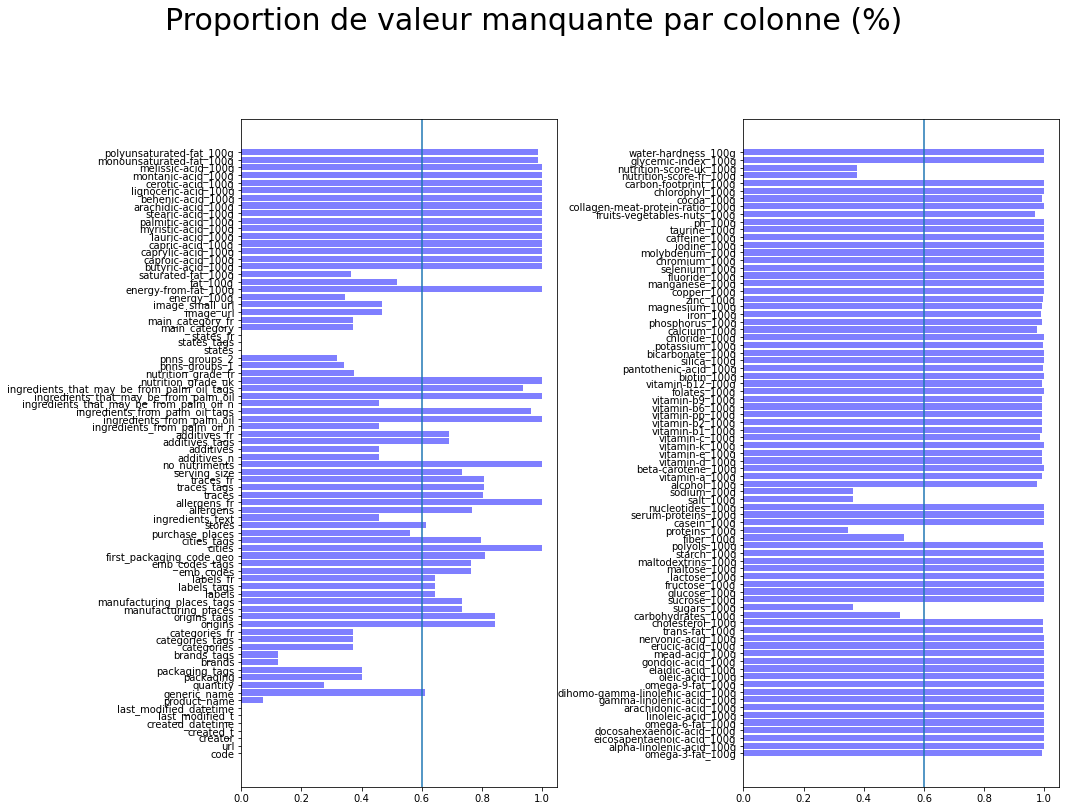

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
fig.suptitle("Proportion de valeur manquante par colonne (%)", size=30)

count = df.isnull().mean(axis=0)
ax1.barh(y=count[:80].index, width=count[:80].values, color='blue', alpha=0.5)
ax1.axvline(x=0.6)
ax2.barh(y=count[80:].index, width=count[80:].values, color='blue', alpha=0.5)
ax2.axvline(x=0.6)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

Remarque :
- On observe beaucoup de features ont un nombre important de valeurs manquantes. Ces features n'apportant alors pas beaucoup d'informations, nous allons supprimer toutes celles qui ont plus de 60% de valeurs manquantes.

In [15]:
threshold = 0.4 * df.shape[0]

df2 = df.dropna(axis=1, thresh=threshold)

In [16]:
print(df2.columns)
df2.shape

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'purchase_places',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')


(98440, 43)

### 5/ Suppression des features "non-utile" pour l'analyse

In [17]:
df3 = df2.drop(['code', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
                'quantity', 'packaging', 'packaging_tags', 'purchase_places', 'additives_n', 'additives', 
                'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'states', 
                'states_tags', 'states_fr', 'image_url', 'image_small_url'], axis=1)
df3.shape

(98440, 24)

In [18]:
## 6/ Conversion de la valeur énergétique en calories - N.B 1 kcal = 4.184 kJ

df3['energy_100g'] = df3['energy_100g'] / 4.184

### 6/ Traitement des valeurs manquantes

In [19]:
# Afficher le nombre de valeurs manquantes par colonne
df3.apply(lambda x: sum(x.isnull()), axis=0)

url                            0
product_name                7193
brands                     12014
brands_tags                12018
categories                 36485
categories_tags            36485
categories_fr              36485
ingredients_text           44974
nutrition_grade_fr         37025
pnns_groups_1              33559
pnns_groups_2              31402
main_category              36485
main_category_fr           36485
energy_100g                33847
fat_100g                   50798
saturated-fat_100g         36065
carbohydrates_100g         51229
sugars_100g                35925
fiber_100g                 52717
proteins_100g              34122
salt_100g                  35866
sodium_100g                35869
nutrition-score-fr_100g    37025
nutrition-score-uk_100g    37025
dtype: int64

In [20]:
df4 = df3.dropna(subset=['product_name', 'energy_100g', 'nutrition-score-fr_100g'])
df4.shape

(60992, 24)

In [21]:
# Afficher le nombre de valeurs manquantes par colonne
df4.apply(lambda x: sum(x.isnull()), axis=0)

url                            0
product_name                   0
brands                       210
brands_tags                  210
categories                 16687
categories_tags            16687
categories_fr              16687
ingredients_text           20133
nutrition_grade_fr             0
pnns_groups_1              14168
pnns_groups_2              14077
main_category              16687
main_category_fr           16687
energy_100g                    0
fat_100g                   17109
saturated-fat_100g             0
carbohydrates_100g         17161
sugars_100g                    0
fiber_100g                 16414
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
dtype: int64

In [22]:
# Remplacement des valeurs restantes
df5 = df4.fillna(np.NaN)
df5.shape

(60992, 24)

### 7/ Traitement des valeurs aberrantes (outliers)

In [23]:
df5.describe(include='all')

,url,product_name,brands,brands_tags,categories,categories_tags,categories_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,60992,60992,60782,60782,44305,44305,44305,40859,60992,46824,46915,44305,44305,60992.000000,43883.000000,60992.000000,43831.000000,60992.000000,44578.000000,60992.000000,60992.000000,60992.000000,60992.000000,60992.000000
unique,60992,51066,12732,9973,19464,11612,11612,38257,5,13,40,1009,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://world-fr.openfoodfacts.org/produit/0000...,Mayonnaise,Carrefour,carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits",Semoule de _blé_ dur de qualité supérieure.,d,Sugary snacks,unknown,en:beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,43,2313,2354,259,488,488,102,16907,7362,6961,1647,1647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.173547,13.334119,5.439707,27.787834,13.389663,2.542348,7.748720,1.082642,0.426237,8.690107,8.369180
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3156.082346,16.767690,8.561807,27.275458,19.020091,4.621375,7.845984,3.815873,1.502264,9.044649,9.384286
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.967495,1.400000,0.300000,4.100000,1.000000,0.000000,1.900000,0.080000,0.031496,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.804971,7.000000,2.000000,14.800000,4.000000,1.300000,6.000000,0.551180,0.217000,9.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.749522,21.000000,7.400000,53.000000,17.870000,3.200000,10.900000,1.230000,0.484252,15.000000,16.000000


In [24]:
# Suppression si energy_100g > 900 calories 
# car les lipides sont les nutriments les plus denses et 100g de lipides = 900 calories
df6 = df5.drop(df5[df5.energy_100g > 900].index)

# Suppression si valeurs nutritionnelles (pour 100g) > 100g ou < 0g
for col in df6.columns[14:-2]:
    df6.drop(df6[(df6[col] > 100) | (df6[col] < 0)].index, inplace=True)
    
# Suppresion si somme des glucides + lipides + protéines + sel pour 100g > 100g (à 10% près)
df6['temp'] = (df6[['fat_100g', 'saturated-fat_100g']].fillna(0).max(axis=1) 
               + df6[['carbohydrates_100g', 'sugars_100g']].fillna(0).max(axis=1)
               + df6['proteins_100g'].fillna(0) 
               + df6['fiber_100g'].fillna(0) 
               + df6['salt_100g'].fillna(0))
df6.drop(df6[df6['temp'] > 110].index, inplace=True)

# Suppression si calories < lipides*9 + (glucides+proteines)*4 + fibres*1.9 (à 10% près)
df6['temp'] = (9*df6['fat_100g'].fillna(0)
               + 4*(df6['carbohydrates_100g'].fillna(0) + df6['proteins_100g'].fillna(0)) 
               + 1.9*df6['fiber_100g'].fillna(0))
df6.drop(df6[df6['temp'] > 1.1 * df6['energy_100g']].index, inplace=True)

# Suppression si calories > lipides*9 + (glucides+proteines)*4 + fibres*1.9 (à 10% près)
# SI toutes les infos sur les nutriments sont dispos
mask = (~(df6['fat_100g'].isnull() 
          | df6['carbohydrates_100g'].isnull() 
          | df6['fiber_100g'].isnull()) 
        & (df6['energy_100g'] > 1.1 * df6['temp']))
df6.drop(df6[mask].index, inplace=True) 
df6.drop(['temp'], axis=1, inplace=True)

df6.shape

(58715, 24)

### 8/ Traitement des colonnes semblables

#### a/ Catégories d'un produit 
des colonnes: 
- 'categories', 'categories_tags', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category' et 'main_category_fr'

In [25]:
categories = df6[['categories', 'categories_tags', 'categories_fr', 
                 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr']]

In [26]:
print("Nombre de catégories différentes:")
for col in categories:
    print(f"{col} : {len(categories[col].value_counts())}")

Nombre de catégories différentes:
categories : 36982
categories_tags : 21142
categories_fr : 11257
pnns_groups_1 : 13
pnns_groups_2 : 40
main_category : 955
main_category_fr : 955


La choix 'pnns_groups_1' semble être le meilleur avec un nombre de catégories plus réduit, ce qui permettra de faire des analyses plus aisément dessus.

In [27]:
df6['pnns_groups_1'].value_counts()

Sugary snacks              7058
unknown                    6607
Milk and dairy products    5061
Cereals and potatoes       5039
Composite foods            4942
Fish Meat Eggs             4565
Beverages                  3889
Fat and sauces             2657
Fruits and vegetables      2527
Salty snacks               1799
sugary-snacks               373
fruits-and-vegetables       371
cereals-and-potatoes          1
Name: pnns_groups_1, dtype: int64

In [28]:
# Pour harmoniser les catégories
df6['pnns_groups_1'] = df6['pnns_groups_1'].replace(
    'fruits-and-vegetables', 'Fruits and vegetables').replace(
    'sugary-snacks', 'Sugary snacks').replace(
    'cereals-and-potatoes', 'Cereals and potatoes')

In [29]:
df6.head()

,url,product_name,brands,brands_tags,categories,categories_tags,categories_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,Sunridge,sunridge,NaN,NaN,NaN,"Milk chocolate coating (evaporated cane juice,...",e,unknown,unknown,NaN,NaN,450.047801,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038000,22.0,22.0
190,http://world-fr.openfoodfacts.org/produit/0000...,Mini Confettis,Alice Délice,alice-delice,NaN,NaN,NaN,NaN,d,NaN,NaN,NaN,NaN,418.977055,NaN,0.8,NaN,87.7,0.9,0.6,0.01000,0.003937,14.0,14.0
191,http://world-fr.openfoodfacts.org/produit/0000...,Praliné Amande Et Noisette,Alice Délice,alice-delice,NaN,NaN,NaN,NaN,d,NaN,NaN,NaN,NaN,575.047801,NaN,2.9,NaN,50.3,3.9,9.5,0.00300,0.001181,14.0,14.0
226,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",Pepsi,pepsi,Sodas au cola,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...","Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,en:sodas,Sodas,42.304015,0.0,0.0,10.4,10.4,0.0,0.0,0.02540,0.010000,13.0,2.0
234,http://world-fr.openfoodfacts.org/produit/0000...,Tarte Poireaux Et Lardons,Bo Frost,bo-frost,NaN,NaN,NaN,NaN,d,NaN,NaN,NaN,NaN,257.887189,NaN,11.0,NaN,1.0,1.4,7.5,0.80000,0.314961,15.0,15.0


In [30]:
#On retire les autres catég qui nous interresse pas 
df7 = df6.drop(['categories', 'categories_tags', 'categories_fr', 
                'pnns_groups_2', 'main_category', 'main_category_fr'], axis=1)
df7.shape

(58715, 18)

In [31]:
import dtale 
df7AnalyseD = dtale.show(df7)
df7AnalyseD

d:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\dtale\views.py:725: FutureWarning:

['brands', 'brands_tags', 'ingredients_text', 'pnns_groups_1'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [32]:
df7.head()


,url,product_name,brands,brands_tags,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,Sunridge,sunridge,"Milk chocolate coating (evaporated cane juice,...",e,unknown,450.047801,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038000,22.0,22.0
190,http://world-fr.openfoodfacts.org/produit/0000...,Mini Confettis,Alice Délice,alice-delice,NaN,d,NaN,418.977055,NaN,0.8,NaN,87.7,0.9,0.6,0.01000,0.003937,14.0,14.0
191,http://world-fr.openfoodfacts.org/produit/0000...,Praliné Amande Et Noisette,Alice Délice,alice-delice,NaN,d,NaN,575.047801,NaN,2.9,NaN,50.3,3.9,9.5,0.00300,0.001181,14.0,14.0
226,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",Pepsi,pepsi,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,42.304015,0.0,0.0,10.4,10.4,0.0,0.0,0.02540,0.010000,13.0,2.0
234,http://world-fr.openfoodfacts.org/produit/0000...,Tarte Poireaux Et Lardons,Bo Frost,bo-frost,NaN,d,NaN,257.887189,NaN,11.0,NaN,1.0,1.4,7.5,0.80000,0.314961,15.0,15.0


In [33]:
#ESSAIE
df7['pnns_groups_1'] = np.where((df7['pnns_groups_1'].isnull()==True), "unknown", 
                                 np.where(df7['pnns_groups_1'] == "", "unknown", df7['pnns_groups_1']))

In [34]:
df7.head()

,url,product_name,brands,brands_tags,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,Sunridge,sunridge,"Milk chocolate coating (evaporated cane juice,...",e,unknown,450.047801,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038000,22.0,22.0
190,http://world-fr.openfoodfacts.org/produit/0000...,Mini Confettis,Alice Délice,alice-delice,NaN,d,unknown,418.977055,NaN,0.8,NaN,87.7,0.9,0.6,0.01000,0.003937,14.0,14.0
191,http://world-fr.openfoodfacts.org/produit/0000...,Praliné Amande Et Noisette,Alice Délice,alice-delice,NaN,d,unknown,575.047801,NaN,2.9,NaN,50.3,3.9,9.5,0.00300,0.001181,14.0,14.0
226,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",Pepsi,pepsi,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,42.304015,0.0,0.0,10.4,10.4,0.0,0.0,0.02540,0.010000,13.0,2.0
234,http://world-fr.openfoodfacts.org/produit/0000...,Tarte Poireaux Et Lardons,Bo Frost,bo-frost,NaN,d,unknown,257.887189,NaN,11.0,NaN,1.0,1.4,7.5,0.80000,0.314961,15.0,15.0


In [35]:


numerical_features = list(df7.select_dtypes(include=["float64","int64"]).columns)




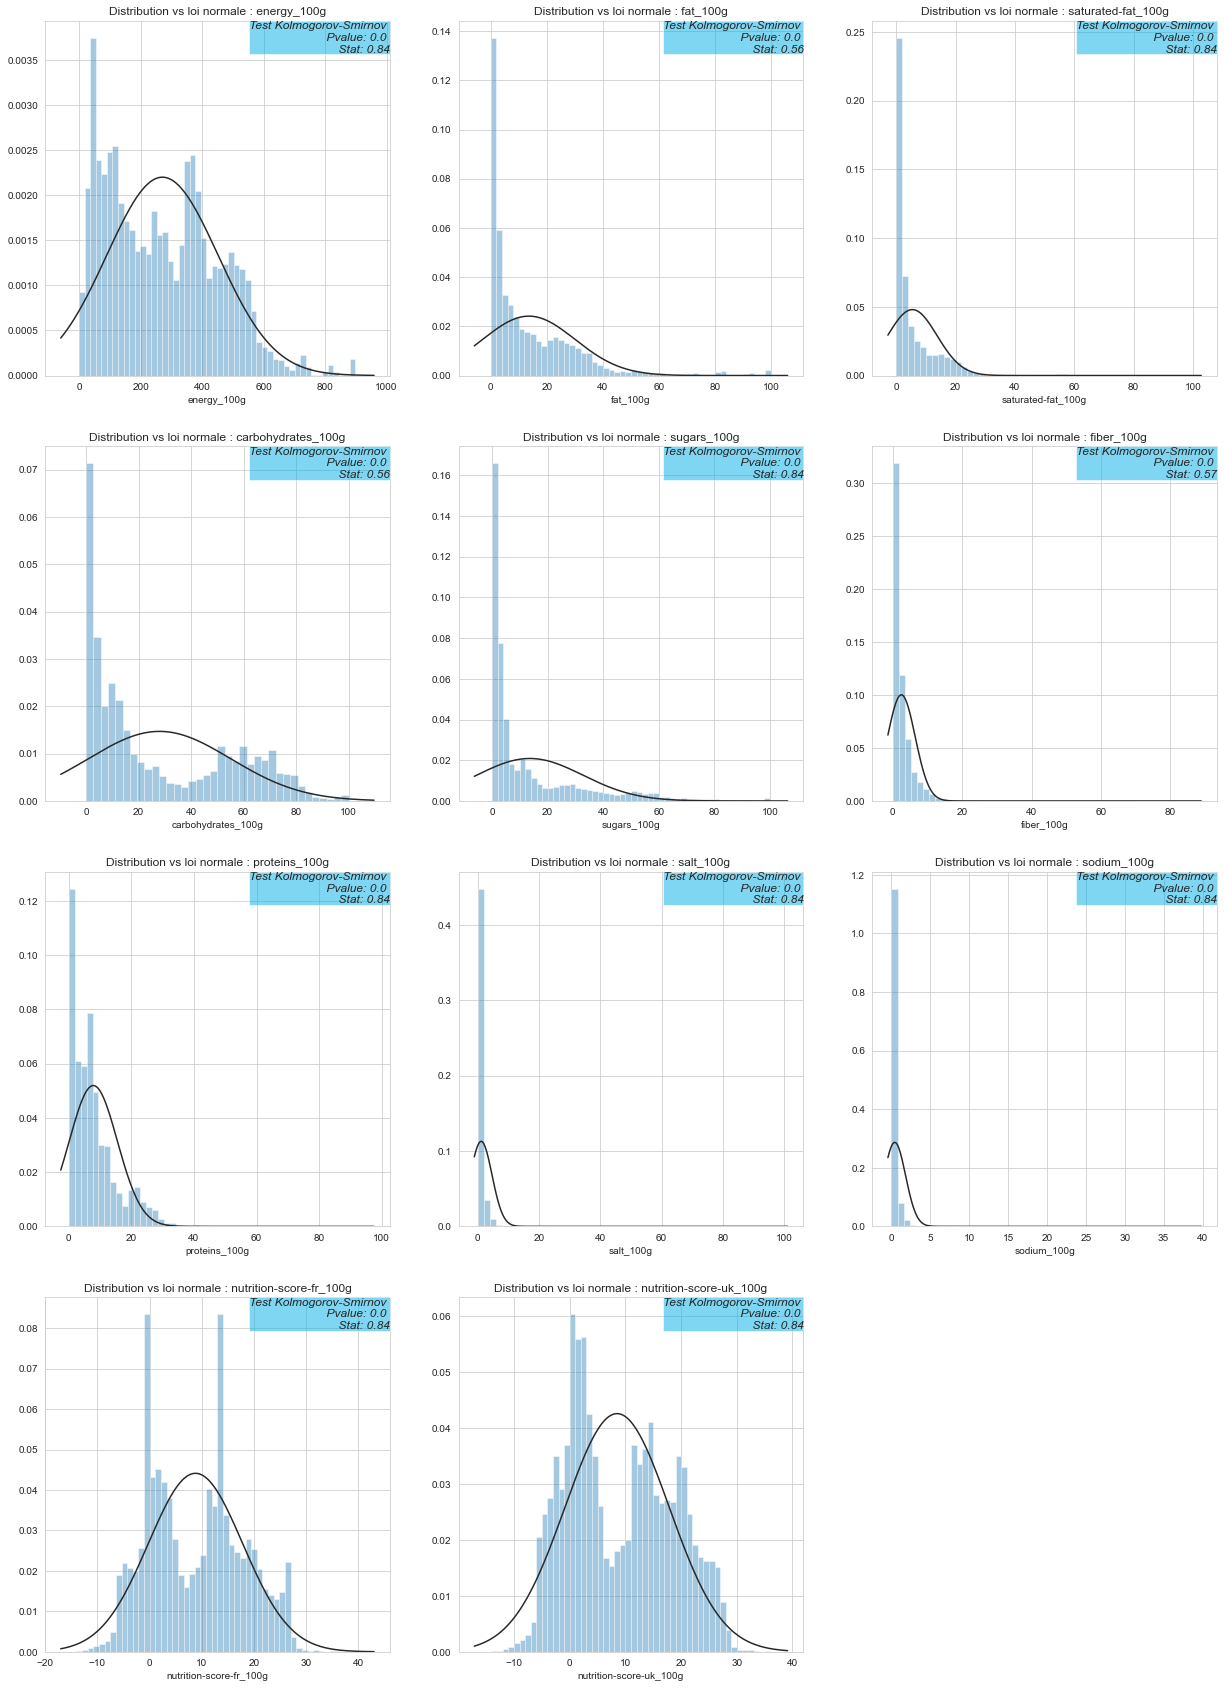

In [36]:

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    kstest = stats.kstest(df7[colonne].notnull(),'norm')
    ax = sns.distplot(df7[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

#### Remarque :
En se basant sur les projections obtenues et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau du test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables. Il serait donc inexact d'imputer les valeurs manquantes par la moyenne.

N.B:
- Le test de Kolmogorov-Smirnov permet de tester l'ajustement des données x à n'importe quelle loi, dont la loi normale.Ce test détermine si les observations d'un échantillon peuvent raisonnablement provenir d'une distribution théorique donnée.
- Le principe est simple. On mesure l'écart maximum qui existe entre la fonction de répartition observée (ou tout simplement des fréquences cumulées) et la fonction de répartition théorique. Sous l'hypothèse H0, cet écart est faible et la répartition des observations s'intègre bien dans une distribution donnée.

Pour continuer sur cette approche, regardons à présent quelque-unes de ces distributions en fonction de la catégorie pnns_groups_1 :

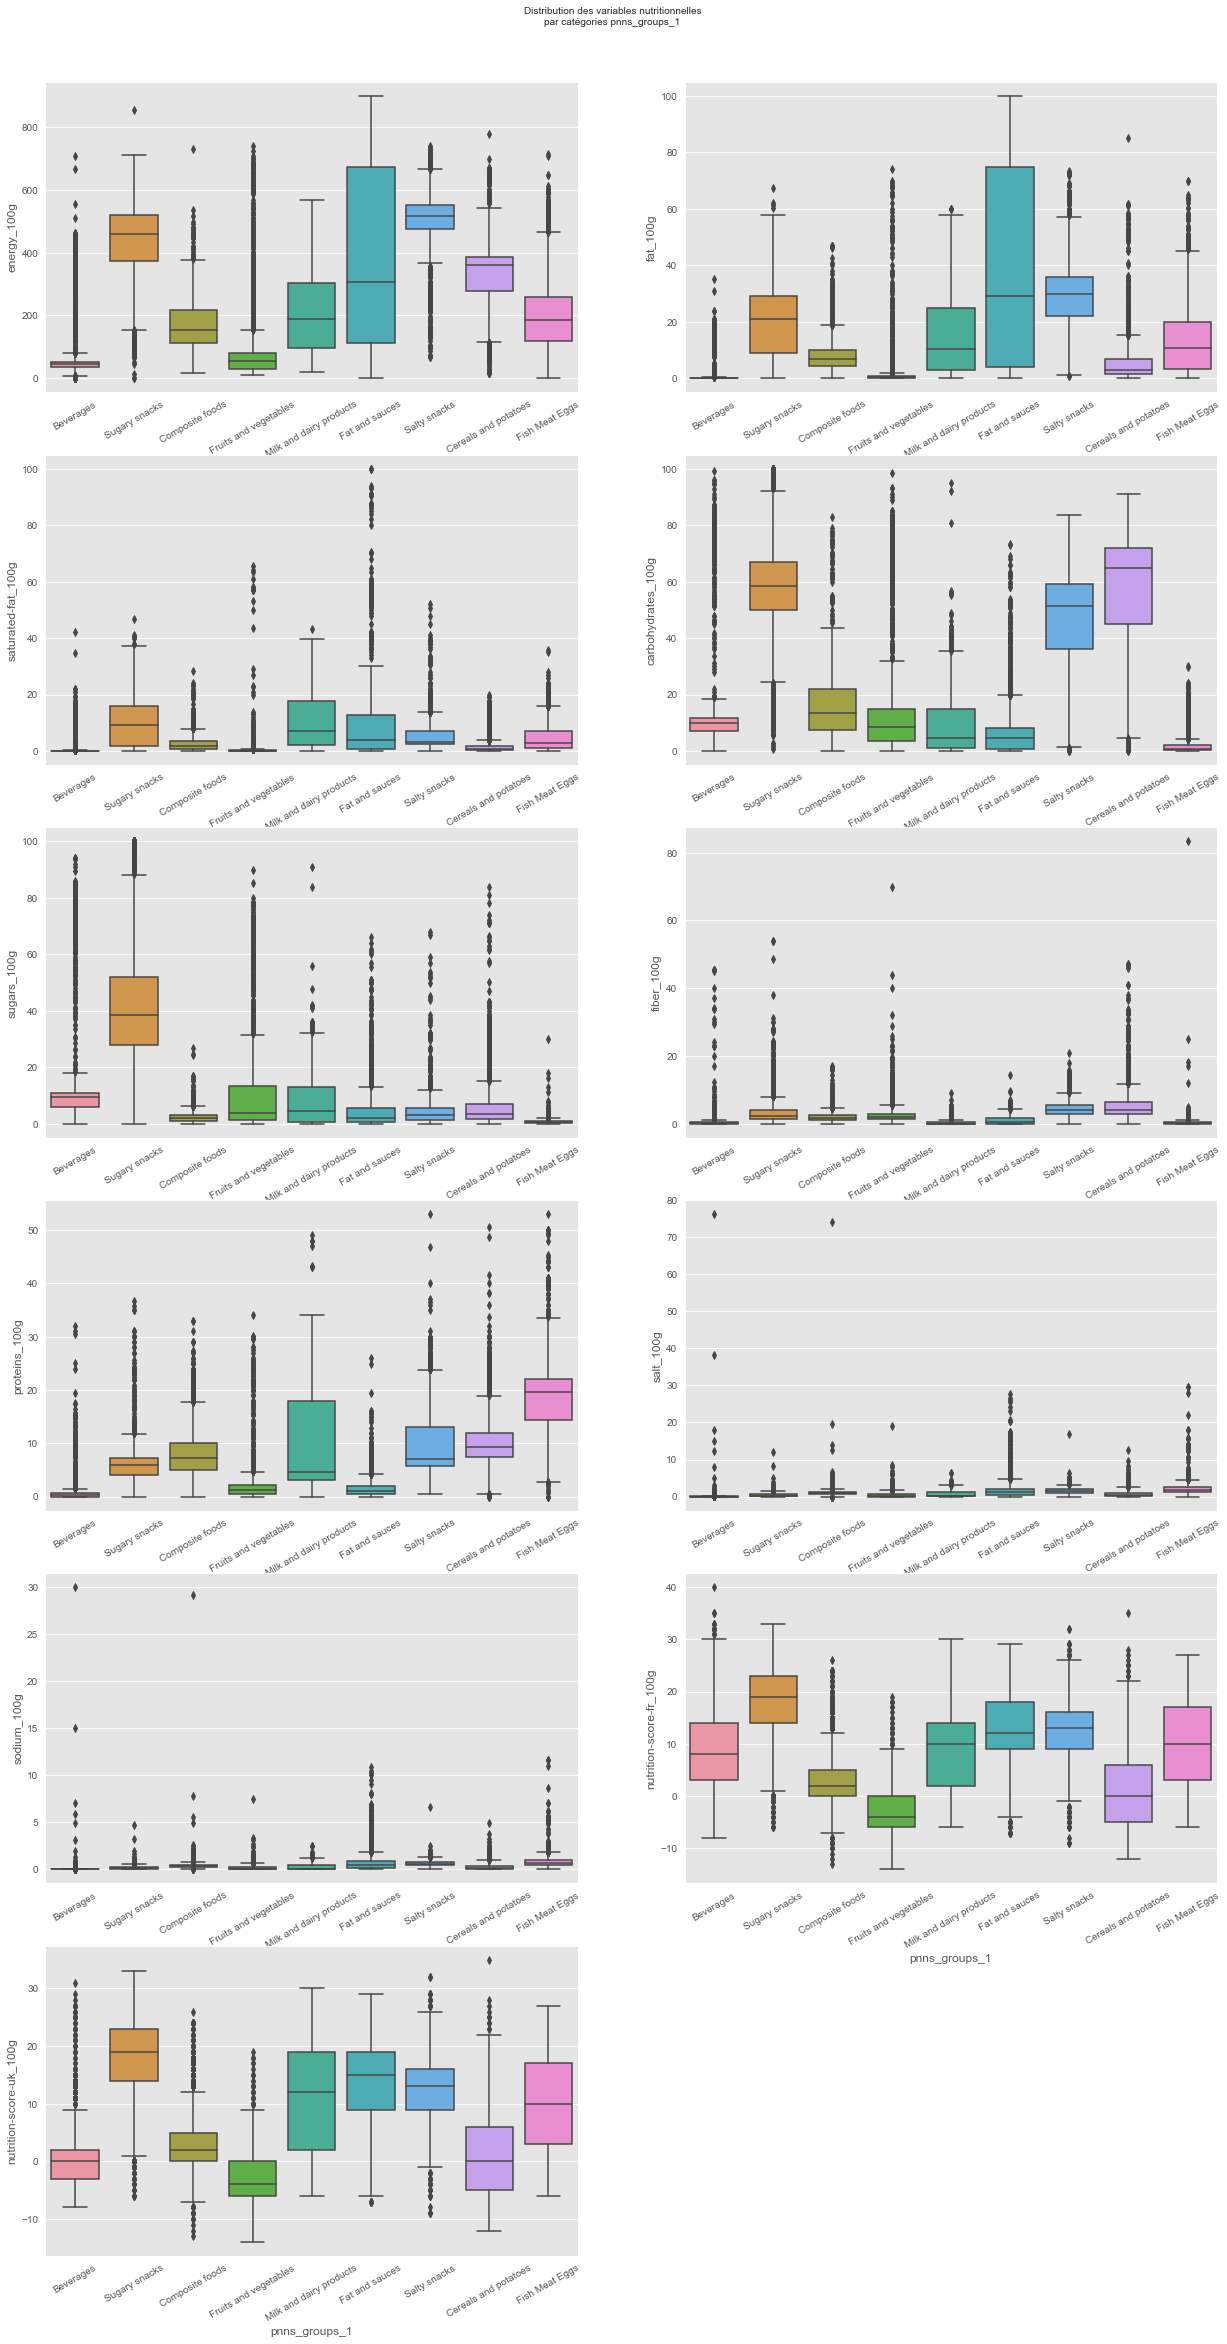

In [37]:

plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,2,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=df7[df7["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center", 
         )
plt.show()

In [38]:
#ESSAIE 1: METHODE 1 - KNN 
# KNN pour les autres variables
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
knn_features = ['energy_100g','proteins_100g','saturated-fat_100g','sugars_100g','salt_100g','fat_100g','carbohydrates_100g']
sample_datas = df7[knn_features].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [39]:
#ESSAIE1 : METHODE 1 - KNN 
# Puis on applique le modèle sur l'ensemble des données
datas_imputed = imputer.transform(df7[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

In [40]:
df_datas_imputed.head()

,energy_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g,fat_100g,carbohydrates_100g
0,450.047801,2.5,12.5,57.5,0.09652,20.00,70.00
1,418.977055,0.6,0.8,87.7,0.01000,3.64,91.32
2,575.047801,9.5,2.9,50.3,0.00300,37.80,55.20
3,42.304015,0.0,0.0,10.4,0.02540,0.00,10.40
4,257.887189,7.5,11.0,1.0,0.80000,19.14,13.30


In [41]:
#ESSAIE 1: METHODE 1 - KNN 
for col_knn in knn_features:
    df7[col_knn] = df_datas_imputed[col_knn].values

In [42]:
#ESSAIE 1: METHODE 2 - MEDIAN 
# On complète les variables restantes avec la médiane du groupe pnns 1
for col in ['carbohydrates_100g','fat_100g','fiber_100g']:
    df7[col] = df7.groupby('pnns_groups_1')[col].transform(lambda x: x.fillna(x.median()))

In [43]:
#ESSAIE 1: KNN - MEDIAN  
df7.head()

,url,product_name,brands,brands_tags,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,Sunridge,sunridge,"Milk chocolate coating (evaporated cane juice,...",e,unknown,450.047801,20.00,12.5,70.00,57.5,2.5,2.5,0.09652,0.038000,22.0,22.0
190,http://world-fr.openfoodfacts.org/produit/0000...,Mini Confettis,Alice Délice,alice-delice,NaN,d,unknown,418.977055,3.64,0.8,91.32,87.7,0.9,0.6,0.01000,0.003937,14.0,14.0
191,http://world-fr.openfoodfacts.org/produit/0000...,Praliné Amande Et Noisette,Alice Délice,alice-delice,NaN,d,unknown,575.047801,37.80,2.9,55.20,50.3,3.9,9.5,0.00300,0.001181,14.0,14.0
226,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",Pepsi,pepsi,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,42.304015,0.00,0.0,10.40,10.4,0.0,0.0,0.02540,0.010000,13.0,2.0
234,http://world-fr.openfoodfacts.org/produit/0000...,Tarte Poireaux Et Lardons,Bo Frost,bo-frost,NaN,d,unknown,257.887189,19.14,11.0,13.30,1.0,1.4,7.5,0.80000,0.314961,15.0,15.0


In [44]:
#ESSAIE 3: méthode 3 - REMPLACER LES VALEURS MANQUANTES PAR ZERO 
from sklearn.impute import SimpleImputer

#Méthode 3 :
 
#Note: La plupart des produits comme les sodas ne présente pas ou peu d'élements gras('fat_100g') dans leurs recettes
#Il possible de prendre aléatoire (10 - 20 Produits ), et d'observer les produits dans cette variables et observer : - si la plupart des produits ne présente pas  ou peu de "fat_100g"  dans leurs recettes =>
# => on peut aisément remplacer les valeurs manquante "Nan" dans cette colonne par "des zéros"  OR ce n'est malheuresement pas le cas ici,c'est pourquoi par la suite seulement produit gazeux comme notamment le "7UP" ,ou nous remplaçerons la valeurs manquantes par "zéro" !



In [45]:
#- Pepsi - Methode 3 : Remplacer les valeurs manquante pour le produit "7up" dans lequel - Le taux matière grasse est de 0 ("fat_100") 
dfSevenup = display(df6[df6["product_name"] == '7up'])
dfSevenup =df6.loc[(df6['product_name'] == "7up") & (df6['fat_100g'].isnull()),"fat_100g"]=0
subsetSevenup = df6.loc[df6['product_name'] == "7up" ,"fat_100g"] = 0 

,url,product_name,brands,brands_tags,categories,categories_tags,categories_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
262467,http://world-fr.openfoodfacts.org/produit/4060...,7up,"7up,Pepsi","7up,pepsi",Erfrischungsgetränk,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Boissons sucrées","Wasser, Zucker, Kohlensäure, Säuerungsmittel C...",e,Beverages,Sweetened beverages,en:sodas,Sodas,42.304015,0.0,0.0,10.4,10.4,0.0,0.0,0.040,0.015748,13.0,2.0
275663,http://world-fr.openfoodfacts.org/produit/5352...,7up,Seven-Up,seven-up,"Boissons,Boissons gazeuses,Sodas,Boissons sucrées","en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Boissons sucrées","Eau gazéifiée, sucre, acide citrique, arôme na...",e,Beverages,Sweetened beverages,en:sodas,Sodas,42.782027,0.0,0.0,11.0,11.0,0.0,0.0,0.036,0.014173,14.0,2.0


In [46]:
#- Methode 3 : De même pour "le pepsi" => le taux matière fibreux et grasse à équivaut à 0  

Df6brut = display(df6[df6["brands"] == 'Pepsi'])



,url,product_name,brands,brands_tags,categories,categories_tags,categories_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
226,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",Pepsi,pepsi,Sodas au cola,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...","Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,en:sodas,Sodas,42.304015,0.0,0.0,10.40,10.40,0.0,0.0,0.025400,0.010000,13.0,2.0
222134,http://world-fr.openfoodfacts.org/produit/3279...,Pepsi max 50,Pepsi,pepsi,Sodas au cola light,"en:beverages,en:artificially-sweetened-beverag...","Boissons,Boissons édulcorées,Boissons gazeuses...",NaN,b,Beverages,Non-sugared beverages,en:diet-sodas,Sodas light,0.956023,NaN,0.0,NaN,0.00,0.0,0.0,0.010000,0.003937,1.0,0.0
235783,http://world-fr.openfoodfacts.org/produit/3502...,Pepsi Max,Pepsi,pepsi,NaN,NaN,NaN,NaN,b,unknown,unknown,NaN,NaN,0.956023,NaN,0.0,NaN,0.00,0.0,0.0,0.010000,0.003937,0.0,0.0
235786,http://world-fr.openfoodfacts.org/produit/3502...,Pepsi light décaféiné,Pepsi,pepsi,"Boissons,Boissons gazeuses,Boissons édulcorées...","en:beverages,en:artificially-sweetened-beverag...","Boissons,Boissons édulcorées,Boissons gazeuses...","Eau gazéifiée, colorant (caramel E150d), acidi...",b,Beverages,Artificially sweetened beverages,en:diet-sodas,Sodas light,0.239006,0.0,0.0,0.00,0.00,NaN,0.0,0.010000,0.003937,1.0,0.0
235787,http://world-fr.openfoodfacts.org/produit/3502...,Pack de 6 Pepsi 33 cl,Pepsi,pepsi,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...","en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...","Eau gazéifiée, sucre, colorant: caramel (E150d...",e,Beverages,Sweetened beverages,en:sodas,Sodas,44.216061,0.0,0.0,10.90,10.90,NaN,0.0,0.010000,0.003937,15.0,2.0
235825,http://world-fr.openfoodfacts.org/produit/3502...,Pepsi,Pepsi,pepsi,"Boissons,Boissons gazeuses,Sodas,Sodas au cola","en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...","Eau gazéifiée, sucre, colorant (caramel E150d)...",e,Beverages,Sweetened beverages,en:sodas,Sodas,44.216061,0.0,0.0,10.90,10.90,NaN,0.0,0.010000,0.003937,15.0,2.0
235842,http://world-fr.openfoodfacts.org/produit/3502...,Pepsi Next,Pepsi,pepsi,"Boissons,Boissons gazeuses,Boissons édulcorées...","en:beverages,en:artificially-sweetened-beverag...","Boissons,Boissons édulcorées,Boissons gazeuses...","Eau gazéifiée, sucre, colorant (caramel E150d)...",e,Beverages,Artificially sweetened beverages,en:diet-sodas,Sodas light,30.592734,0.0,0.0,7.50,7.40,NaN,0.0,0.000000,0.000000,10.0,1.0
235843,http://world-fr.openfoodfacts.org/produit/3502...,Next,Pepsi,pepsi,"Boissons,Boissons gazeuses,Boissons édulcorées...","en:beverages,en:artificially-sweetened-beverag...","Boissons,Boissons édulcorées,Boissons gazeuses...","Eau gazéifiée, sucre, colorant (caramel E150d)...",e,Beverages,Sweetened beverages,en:sodas,Sodas,30.592734,0.0,0.0,7.50,7.40,NaN,0.0,0.000000,0.000000,10.0,1.0
235844,http://world-fr.openfoodfacts.org/produit/3502...,Pepsi Next (+1 boîte gratuite),Pepsi,pepsi,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...","en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...","Eau gazéifiée, sucre, colorant (caramel E150d)...",e,Beverages,Sweetened beverages,en:sodas,Sodas,30.592734,0.0,0.0,7.50,7.40,NaN,0.0,0.000000,0.000000,10.0,1.0
235892,http://world-fr.openfoodfacts.org/produit/3502...,Pepsi,Pepsi,pepsi,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...","en:beverages,en:carbonated-drinks,en:sodas,en:...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...","eau gazéifiée, sucre, colorant (caramel E150d)...",e,Beverages,Sweetened beverag

Text(0.5, 1.0, 'Boite à moustache énergie - 100g  après filtre')

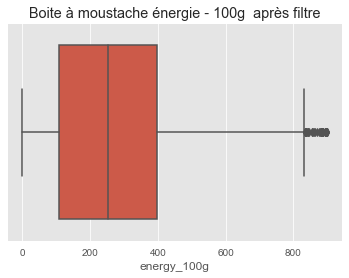

In [47]:
ax = sns.boxplot(x=df7["energy_100g"])
plt.title('Boite à moustache énergie - 100g  après filtre')

Text(0.5, 1.0, 'Boite à moustache du sucre pour 100G')

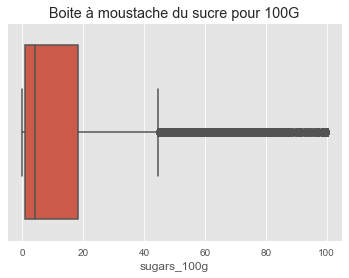

In [48]:
ax = sns.boxplot(x=df7["sugars_100g"])
plt.title('Boite à moustache du sucre pour 100G')

In [49]:
#Matrice de corréalation
mydataset = df7

df = mydataset

#Get the column names

numerical_columns = list(df.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df.select_dtypes(include=[object]).columns)
date_columns = list(df.select_dtypes(include=['<M8[ns]']).columns)

# Select variables to plot for the correlation matrix
corr_matrix_vars = numerical_columns[0:50]

print("Plotting the correlation matrix on the following variables : %s" % corr_matrix_vars)

Plotting the correlation matrix on the following variables : ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


### Correlation matrix 
La toute première analyse de corrélation consiste à tracer la "matrice de corrélation" pour les variables numériques.

Pour chaque couple de variables numériques, cela calcule la "force" de la corrélation (appelée coefficient de Pearson):

- 1.0 signifie une corrélation parfaite
- 0,0 signifie aucune corrélation
- 1.0 signifie une corrélation "inverse" parfaite

<AxesSubplot:>

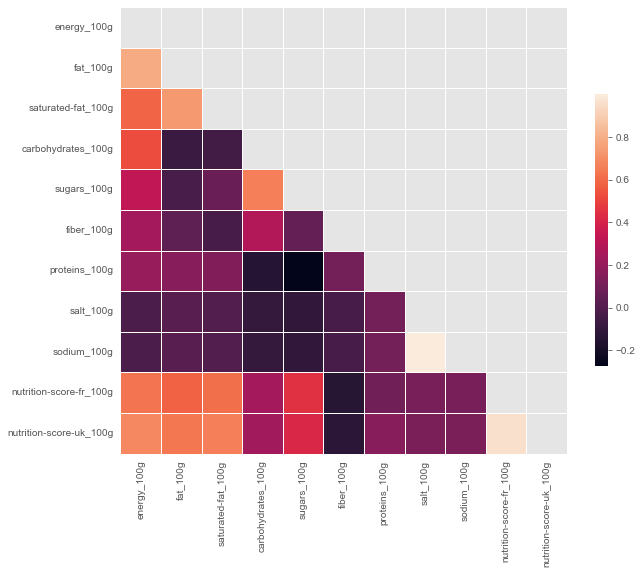

In [50]:
# Only select the requested columns
df_corr_matrix = df[corr_matrix_vars]

# This computes the Pearson coefficient for all couples
corr = df_corr_matrix.corr().fillna(0)

# Start drawing

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
size = max(10, len(corr.columns)/2.)
f, ax = plt.subplots(figsize=(size, size))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, ax=ax)

### Le cas : " le sel et le sodium"

N.B:  il s'agit de la même chose, en effet le sel est du chlorure de sodium, donc 1g de sodium correspond à environ 2,54g de sel.

Corrélation entre 'salt_100g' et 'sodium_100g': 0.9999999966646621


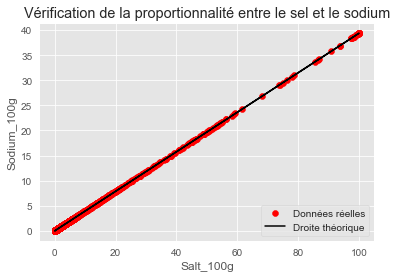

In [51]:
print(f"Corrélation entre 'salt_100g' et 'sodium_100g': {df7['salt_100g'].corr(df7['sodium_100g'])}")

plt.title('Vérification de la proportionnalité entre le sel et le sodium')
plt.scatter(df7['salt_100g'], df7['sodium_100g'], color='red', label='Données réelles')
plt.plot(df7['salt_100g'], df7['salt_100g'] / 2.54, color='black', label='Droite théorique')
plt.xlabel('Salt_100g')
plt.ylabel('Sodium_100g')
plt.legend(loc='lower right')
plt.show()

In [52]:
df8 = df7.drop(['sodium_100g'], axis=1)
df8.shape

(58715, 17)

### les cas : Entre les scores nutritionnels "FR" et "UK"

Remarque : les  deux colonnes: 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g' sont proches mais utilisent un barème un peu différent.

In [53]:
mask = df8['nutrition-score-fr_100g'] == df8['nutrition-score-uk_100g']

print(f"Les 2 scores sont identiques dans "
      f"{len(df8[mask])/df8.shape[0]*100:.2f}% des cas")

Les 2 scores sont identiques dans 89.81% des cas


En fait le barème est différent pour :
- les boissons, les fromages et les matières grasses. Nous pouvons le voir:

In [54]:
df8[~mask]['pnns_groups_1'].value_counts()

Beverages                  3480
Milk and dairy products    1973
Fat and sauces              485
unknown                      39
Composite foods               6
Salty snacks                  1
Name: pnns_groups_1, dtype: int64

Ici pour cette étude nous allons conserver "Le score nutritionnel français" étant le marché"-cible".

In [55]:
df9 = df8.drop(['nutrition-score-uk_100g'], axis=1)
df9.shape

(58715, 16)

### Les cas: Entre brands et brands_tags

In [56]:
df9[['brands', 'brands_tags']].sample(10)

,brands,brands_tags
252076,La Boulangère,la-boulangere
214538,Gabriel meffre,gabriel-meffre
213010,Cora,cora
209713,U,u
252290,Leader Price,leader-price
207110,Netto,netto
215421,Leader Price,leader-price
227802,"Monoprix Bio,Monoprix","monoprix-bio,monoprix"
193479,Fleury Michon,fleury-michon
291782,Nestlé,nestle


In [57]:
print("Nombre de valeurs manquantes:")
for col in ['brands', 'brands_tags']:
    print(f"{col} : {sum(df9[col].isnull())}")

Nombre de valeurs manquantes:
brands : 194
brands_tags : 194


Remarque: 

- Visiblement des deux mêmes colonnes, formatées différemment (sans casse / ni espaces/pas de masjucule au dbt -> pour brands_tags). Nous pouvons n'en garder qu'une sur les deux.

In [58]:
df10 = df9.drop(['brands_tags'], axis=1)
df10.shape

(58715, 15)

In [59]:
df10 .head()

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
106,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,Sunridge,"Milk chocolate coating (evaporated cane juice,...",e,unknown,450.047801,20.00,12.5,70.00,57.5,2.5,2.5,0.09652,22.0
190,http://world-fr.openfoodfacts.org/produit/0000...,Mini Confettis,Alice Délice,NaN,d,unknown,418.977055,3.64,0.8,91.32,87.7,0.9,0.6,0.01000,14.0
191,http://world-fr.openfoodfacts.org/produit/0000...,Praliné Amande Et Noisette,Alice Délice,NaN,d,unknown,575.047801,37.80,2.9,55.20,50.3,3.9,9.5,0.00300,14.0
226,http://world-fr.openfoodfacts.org/produit/0000...,"Pepsi, Nouveau goût !",Pepsi,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,42.304015,0.00,0.0,10.40,10.4,0.0,0.0,0.02540,13.0
234,http://world-fr.openfoodfacts.org/produit/0000...,Tarte Poireaux Et Lardons,Bo Frost,NaN,d,unknown,257.887189,19.14,11.0,13.30,1.0,1.4,7.5,0.80000,15.0


## 9/ Sauvegarde du dataset cleané -Final (partie 1 )

In [60]:
df10.to_csv('data.csv', index=False)

Executing shutdown due to inactivity...


2022-08-31 12:14:13,330 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-08-31 12:14:25,837 - INFO     - Executing shutdown...


Voir partie : Analyse exploratoire 

à Réaliser :

- Analyse Univariée

- Analyse Bivariée

(macro-nutriment : lipides,glucides ,proteines et fribres,..); etc ...